In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        #import the necessary data analysis libraries
import numpy as np
import pandas as pd

In [2]:
#import the required machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
#import the data into the jupyter notebook envirionment
data = pd.read_csv(r"C:\Users\Keke Samuel\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\Keke Samuel\Downloads\test.csv")

In [4]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#data pre-processing and cleaning
data.shape
#the data set is made up of 891 rows and 12 columns

(891, 12)

In [7]:
#Check for unique values in each of the variables
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
#check the type of data for each columns
print(data.dtypes)
print(f"""
Number of object features: {len(data.select_dtypes('object').columns)}
Number of int features: {len(data.select_dtypes('int').columns)}
Number of float features: {len(data.select_dtypes('float').columns)}
""")

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Number of object features: 5
Number of int features: 5
Number of float features: 2



In [9]:
data.describe()
#From the count of the summarized data is already obvious that there is missing data in the age column
#cos it has 714 count as compared to the other column/variables and Fare has a high standard deviation.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#check for missing data
data.isnull().sum().sort_values(ascending = True)
#There are missing data in the Age, Cabin and Embarked columns but the Cabin has the highest number of NA which is more 
#than 50% of the total count of the data set. The Cabin column could be dropped and for the Age and Embarked NA, 
#it could either be replaced or deleted.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [11]:
#Create a table to show the sum and percentage of missing data
sna = data.isnull().sum().sort_values(ascending = False)
pna = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

MA = pd.concat([sna,pna.round(0)],axis=1,keys=['Sum_Missing_Data','Percent_Missing_Data'])
MA

,Sum_Missing_Data,Percent_Missing_Data
Cabin,687,77.0
Age,177,20.0
Embarked,2,0.0
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [12]:
dict()
count=dict() # Keys are variables names, and items are missing entries counts.
def missing_values(data):
    for i in data.columns:
     count[i]=np.sum(data[i].isnull())
     miss_val=np.sum(data[i].isnull())
     print('The variable {} has {} missing values.'.format(i,miss_val))
    return count

count=missing_values(data)

The variable PassengerId has 0 missing values.
The variable Survived has 0 missing values.
The variable Pclass has 0 missing values.
The variable Name has 0 missing values.
The variable Sex has 0 missing values.
The variable Age has 177 missing values.
The variable SibSp has 0 missing values.
The variable Parch has 0 missing values.
The variable Ticket has 0 missing values.
The variable Fare has 0 missing values.
The variable Cabin has 687 missing values.
The variable Embarked has 2 missing values.


In [13]:
#show the survival rate base on gender
men=data.loc[data.Sex =='male']['Survived']
rate_men=(sum(men)/len(men)*100)

print("The % of men who survived:", rate_men)

#This result shows that approximately 19% of the men survived the titanic crash

The % of men who survived: 18.890814558058924


In [14]:
women=data.loc[data.Sex =='female']['Survived']
rate_women=sum(women)/len(women)*100

print("The % of women who survived:", rate_women)

#This result shows that approximately 74% of the women survived the crash

The % of women who survived: 74.20382165605095


<Axes: >

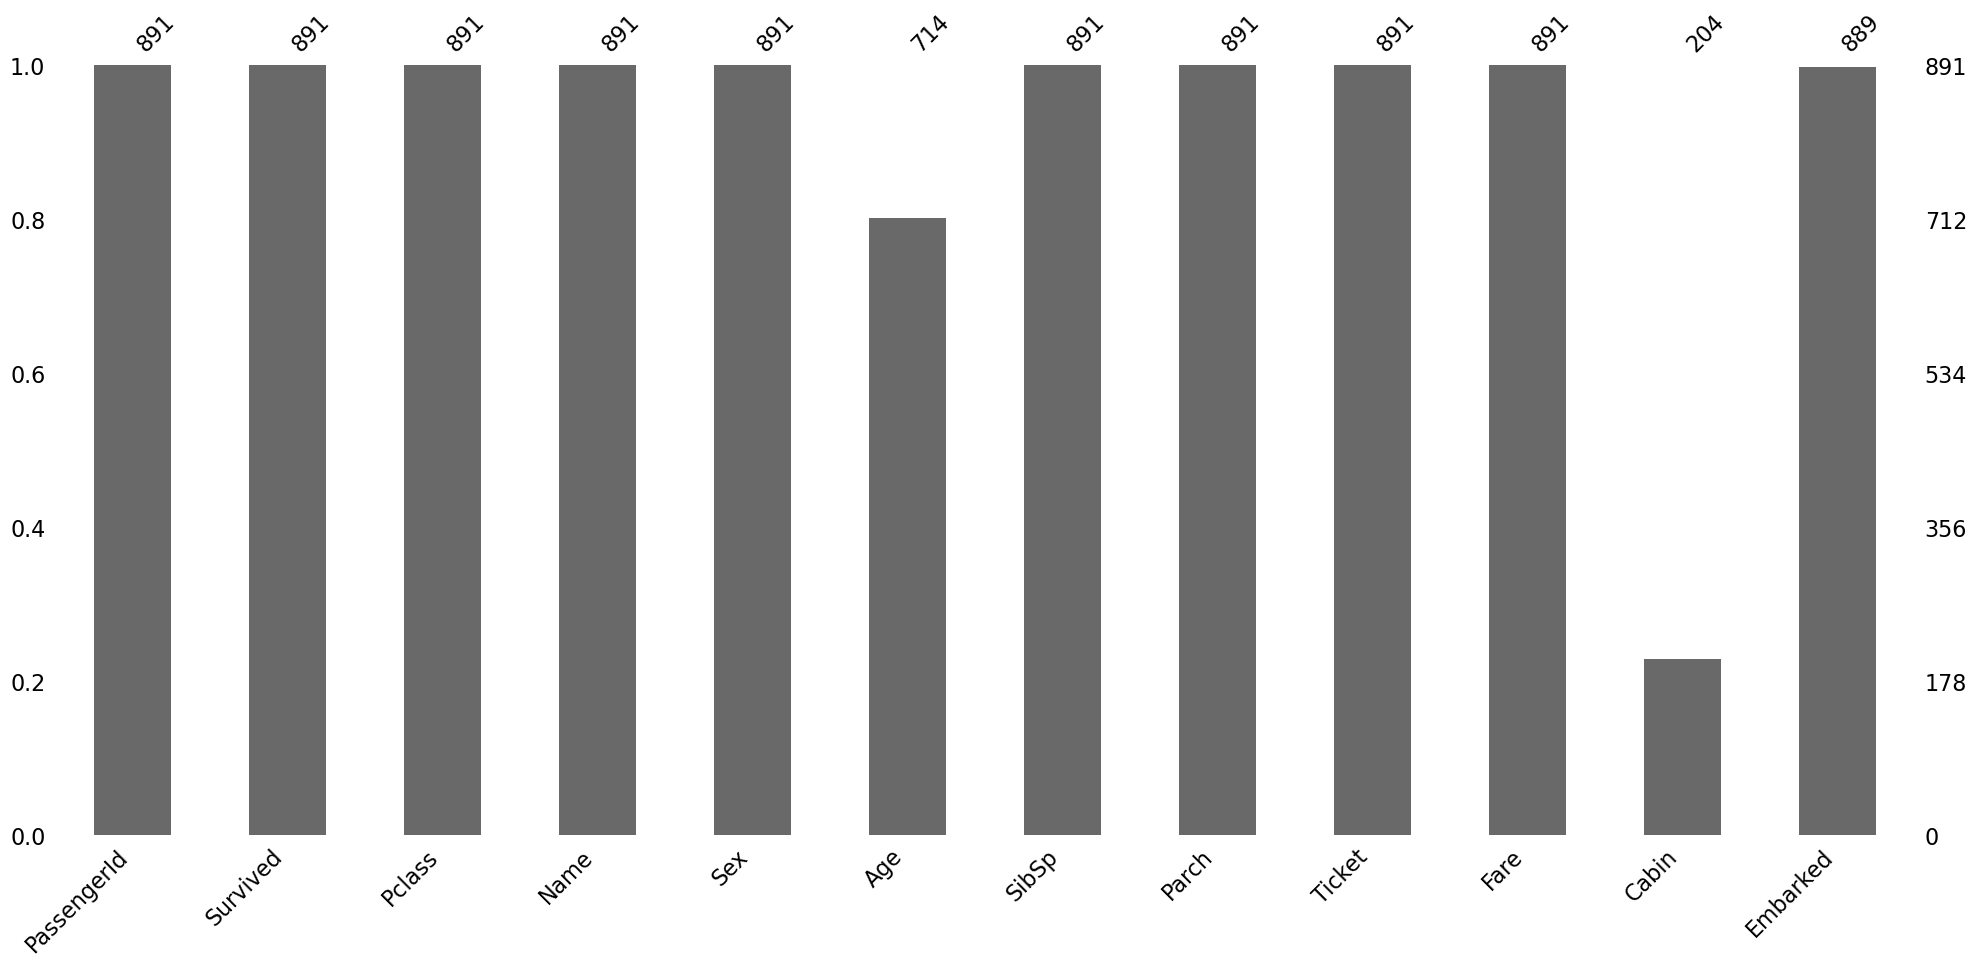

In [15]:
# visualizing null values
import missingno as msno

msno.bar(data)

In [16]:
#for data visualizations
import matplotlib.pyplot as plt

In [17]:
#import the plot library that can help determine which imputation technique to use for missing data
import seaborn as sns

<Axes: >

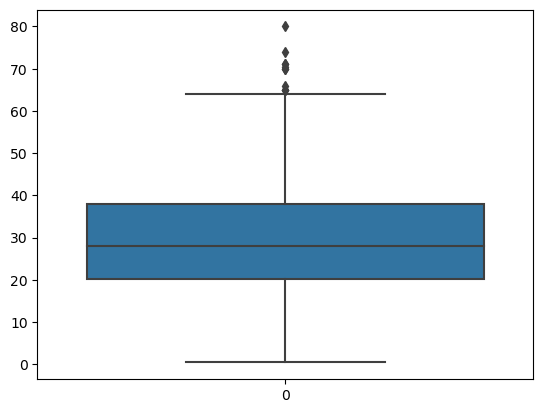

In [18]:
#Do a boxplot to show if the "Age" column has outliers that can skew its results if the mean imputation is utilized
sns.boxplot(data.Age)

#the column does have some outliers but looks to be evenly distributed

C:\Users\Keke Samuel\AppData\Local\Temp\ipykernel_8160\3298701243.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


<Axes: xlabel='Age', ylabel='Density'>

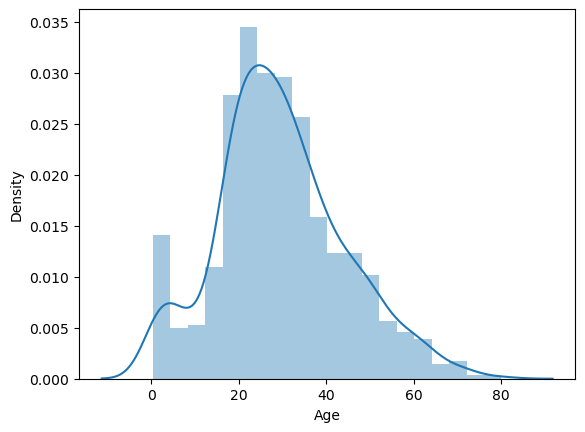

In [19]:
#plot the distribution of the said column and if it has a normal distribution, 
# then choose between mean, median and mode so that the result of the machine learning models will not be affected
sns.distplot(data.Age)
#Since it has a kind of normal distribution the mean of the distribution will be used to replace missing data

In [20]:
#to determine the imputation of missing value for 'Embarked', since its a categorical variable, 
#we will use the mode for the missing value imputation
data['Embarked'].value_counts()

# the unique value "S" has the highest number,so Southampton(S) will be used to replace the missing values in Embarked column

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
#fill in the missing data of age with the mean and missing data of cabin with mode. the Cabin column can be dropped as it has
#alot of missing data and might not be relevant to survival predictions
data.fillna({"Age":data['Age'].mean().round(0), 
           "Embarked":data['Embarked'].mode()[0]}, 
          inplace=True)
print(data)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [22]:
#check if there still exist missing data in age and embarked column
data.isnull().sum()

#The result shows that the Age and Embarked have zero missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
#create a copy of the data frame in order to drop the Cabin column, passenger id and some other unecessary columns
df=data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
#drop the irrelevant columns
drop_cols = ['PassengerId', 'Ticket', 'Name', 'Cabin']
df.drop(drop_cols, axis = 1, inplace = True)


In [25]:
#glimpse the new data frame without the dropped variables
df.head(6)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.0,0,0,8.4583,Q


In [26]:
df.shape

(891, 8)

In [27]:
#Select the columns with numerical value in order to run a correlation analysis
df1=df[['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']]


In [28]:
#Run a correlation to see the relationship between varaiables
corr= df1.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


<Axes: >

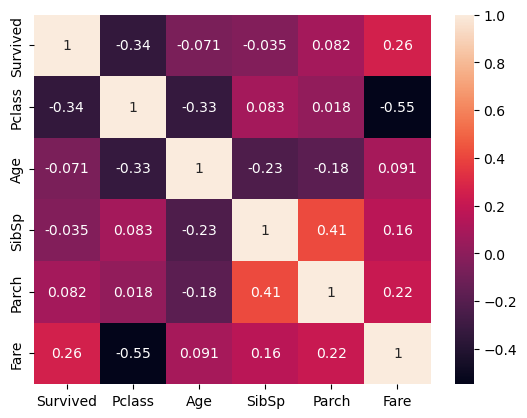

In [29]:
sns.heatmap(corr,annot=True)

# EDA:EXPLORATORY DATA ANALYSIS

In [30]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
s=df['Survived'].sum()
c=df['Survived'].count()
pc=(s/c*100).round(0)
print("The percentage of passengers that survived is {} %".format(pc))

The percentage of passengers that survived is 38.0 %


In [32]:
df[df['Age']==30]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,30.0,0,0,8.4583,Q
17,1,2,male,30.0,0,0,13.0000,S
19,1,3,female,30.0,0,0,7.2250,C
26,0,3,male,30.0,0,0,7.2250,C
28,1,3,female,30.0,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,30.0,0,0,7.2292,C
863,0,3,female,30.0,8,2,69.5500,S
868,0,3,male,30.0,0,0,9.5000,S
878,0,3,male,30.0,0,0,7.8958,S


In [33]:
df[df['Survived']==1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


C:\Users\Keke Samuel\AppData\Local\Temp\ipykernel_8160\1035038450.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Fare, bins =10)


<Axes: title={'center': 'Fare Density Curve'}, xlabel='Fare', ylabel='Density'>

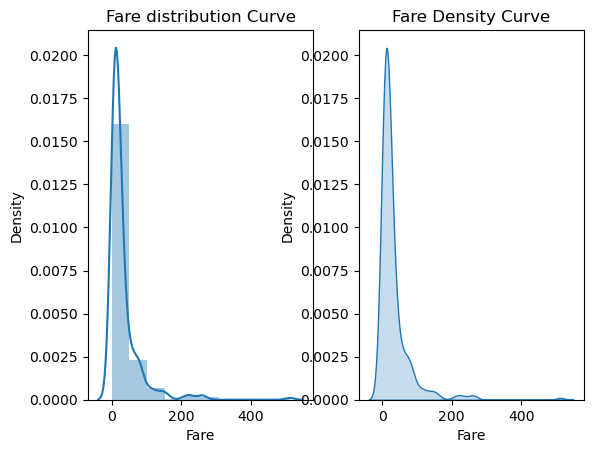

In [34]:
#plot to see if the fare data is normally distributed
figsize=(2, 1)
plt.subplot(1,2,1)
plt.title('Fare distribution Curve')
sns.distplot(data.Fare, bins =10)
plt.subplot(1,2,2)
plt.title('Fare Density Curve')
sns.kdeplot(data = df, x= 'Fare' , fill = True)

#the distribution does not seem to be evenly distributed and its skewed towards the left side, so we will do a box plot 

<Axes: >

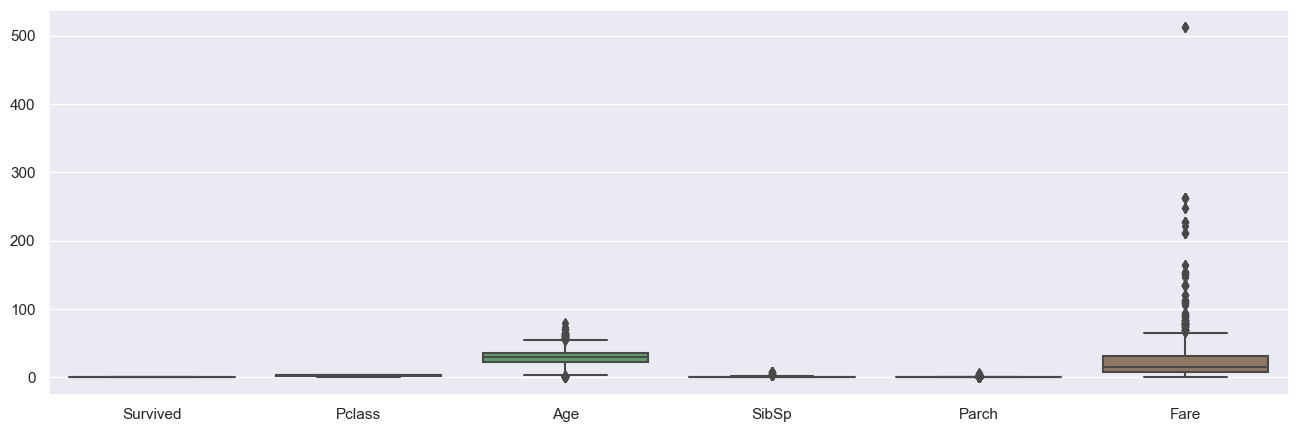

In [35]:
# multiple box plot illustration for numerical variables to show outliers
sns.set(rc={'figure.figsize': (16, 5)})
sns.boxplot(data=df.select_dtypes(include='number'))
# the column 'Fare' seems to have outliers which can distort the result of machine learning

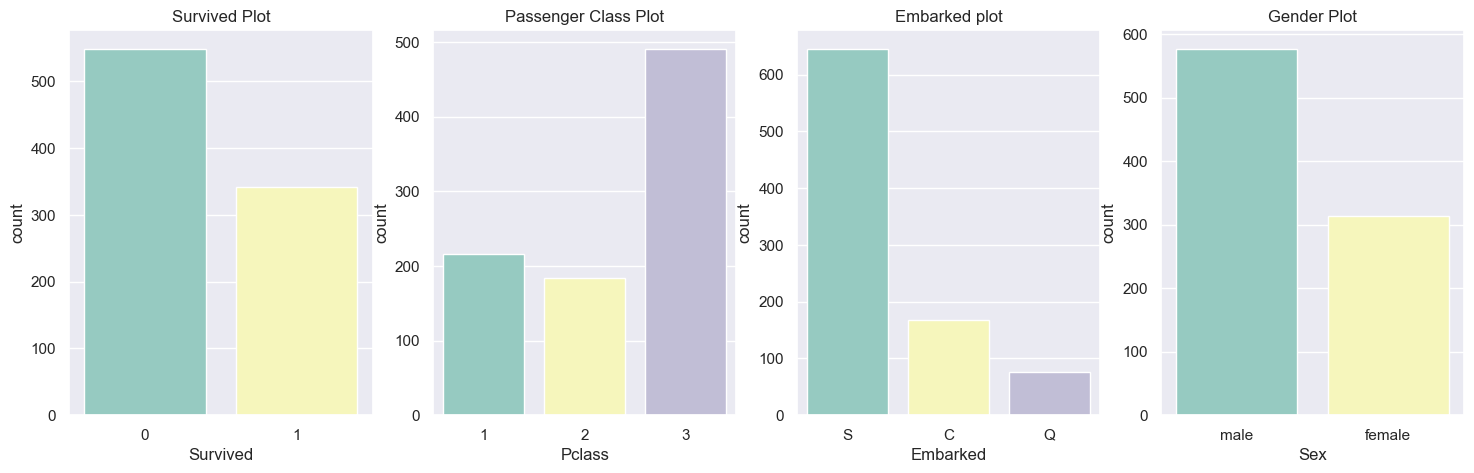

In [36]:
#univariate analysis of categorical variables
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
plt.title('Survived Plot', size =12)
plot= sns.countplot(x = 'Survived', data = df, palette = 'Set3')

plt.subplot(1,4,2)
plt.title('Passenger Class Plot', size = 12)
plot = sns.countplot(x ='Pclass', data =df, palette = 'Set3')

plt.subplot(1,4,3)
plt.title('Embarked plot', size = 12)
plot = sns.countplot(x='Embarked', data = df, palette ='Set3')

plt.subplot(1,4,4)
plt.title('Gender Plot', size = 12)
plot = sns.countplot(x= 'Sex', data = df, palette = 'Set3')



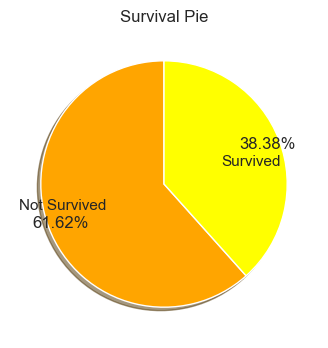

In [37]:
plt.figure(figsize=(4,4))
plt.title('Survival Pie')


plt.pie(df['Survived'].value_counts(),labels=['Not Survived', 'Survived'], autopct ='%1.02f%%', colors=['orange','yellow'],
        shadow=True,startangle=90,labeldistance=0.5, pctdistance=0.9)
plt.show()

<Axes: title={'center': 'Passengers with Siblings/Spouse'}, ylabel='SibSp'>

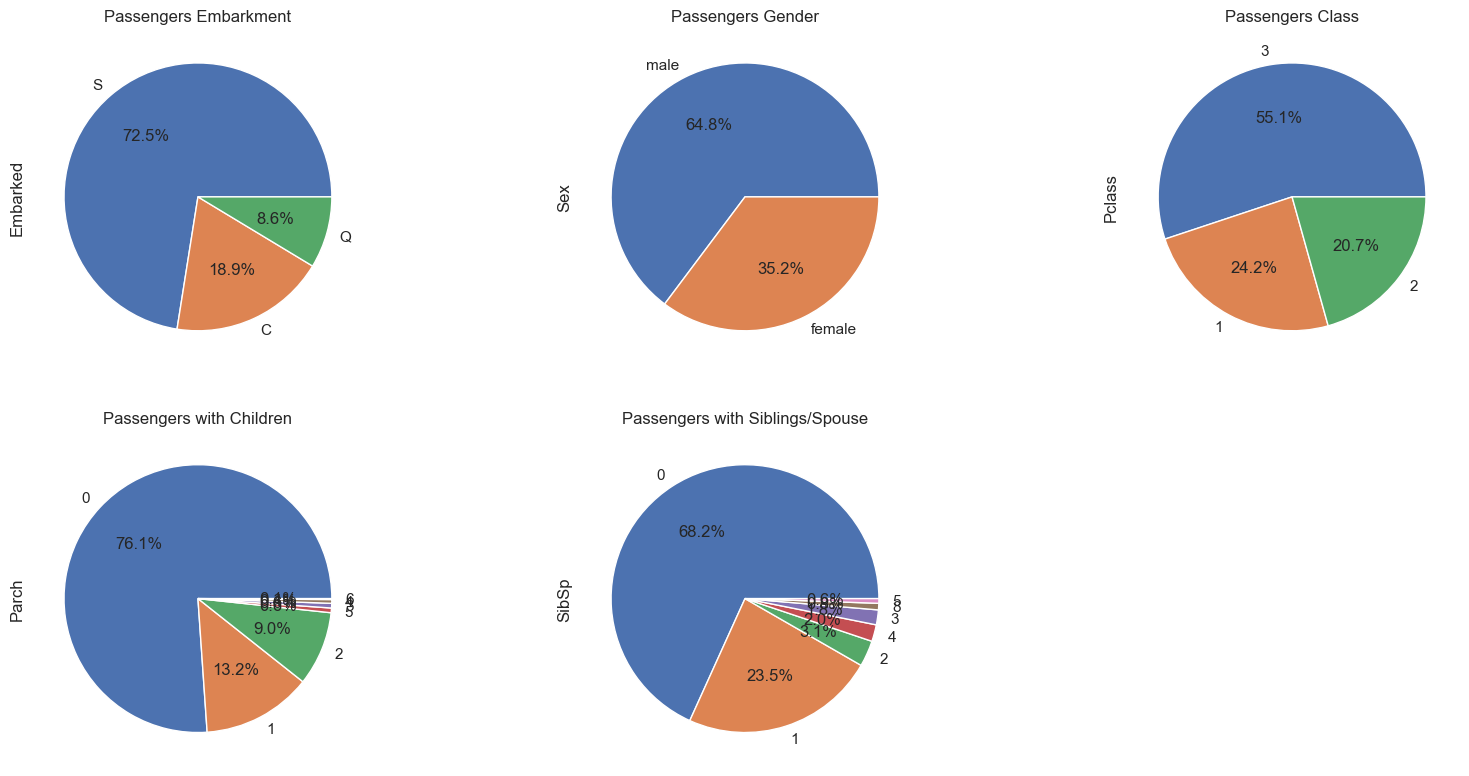

In [38]:
#Percentage distribution of passengers
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.title('Passengers Embarkment')
df['Embarked'].value_counts().plot(kind='pie',autopct='%.1f%%')

plt.subplot(4,3,2)
plt.title('Passengers Gender')
df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

plt.subplot(4,3,3)
plt.title('Passengers Class')
df['Pclass'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

plt.subplot(4,3,4)
plt.title('Passengers with Children')
df['Parch'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

plt.subplot(4,3,5)
plt.title('Passengers with Siblings/Spouse')
df['SibSp'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [39]:
#Analysis of variables based on Survival columns
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [40]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [41]:
df.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

<Axes: title={'center': 'Survival Based on Passenger Fare'}, xlabel='Fare', ylabel='Density'>

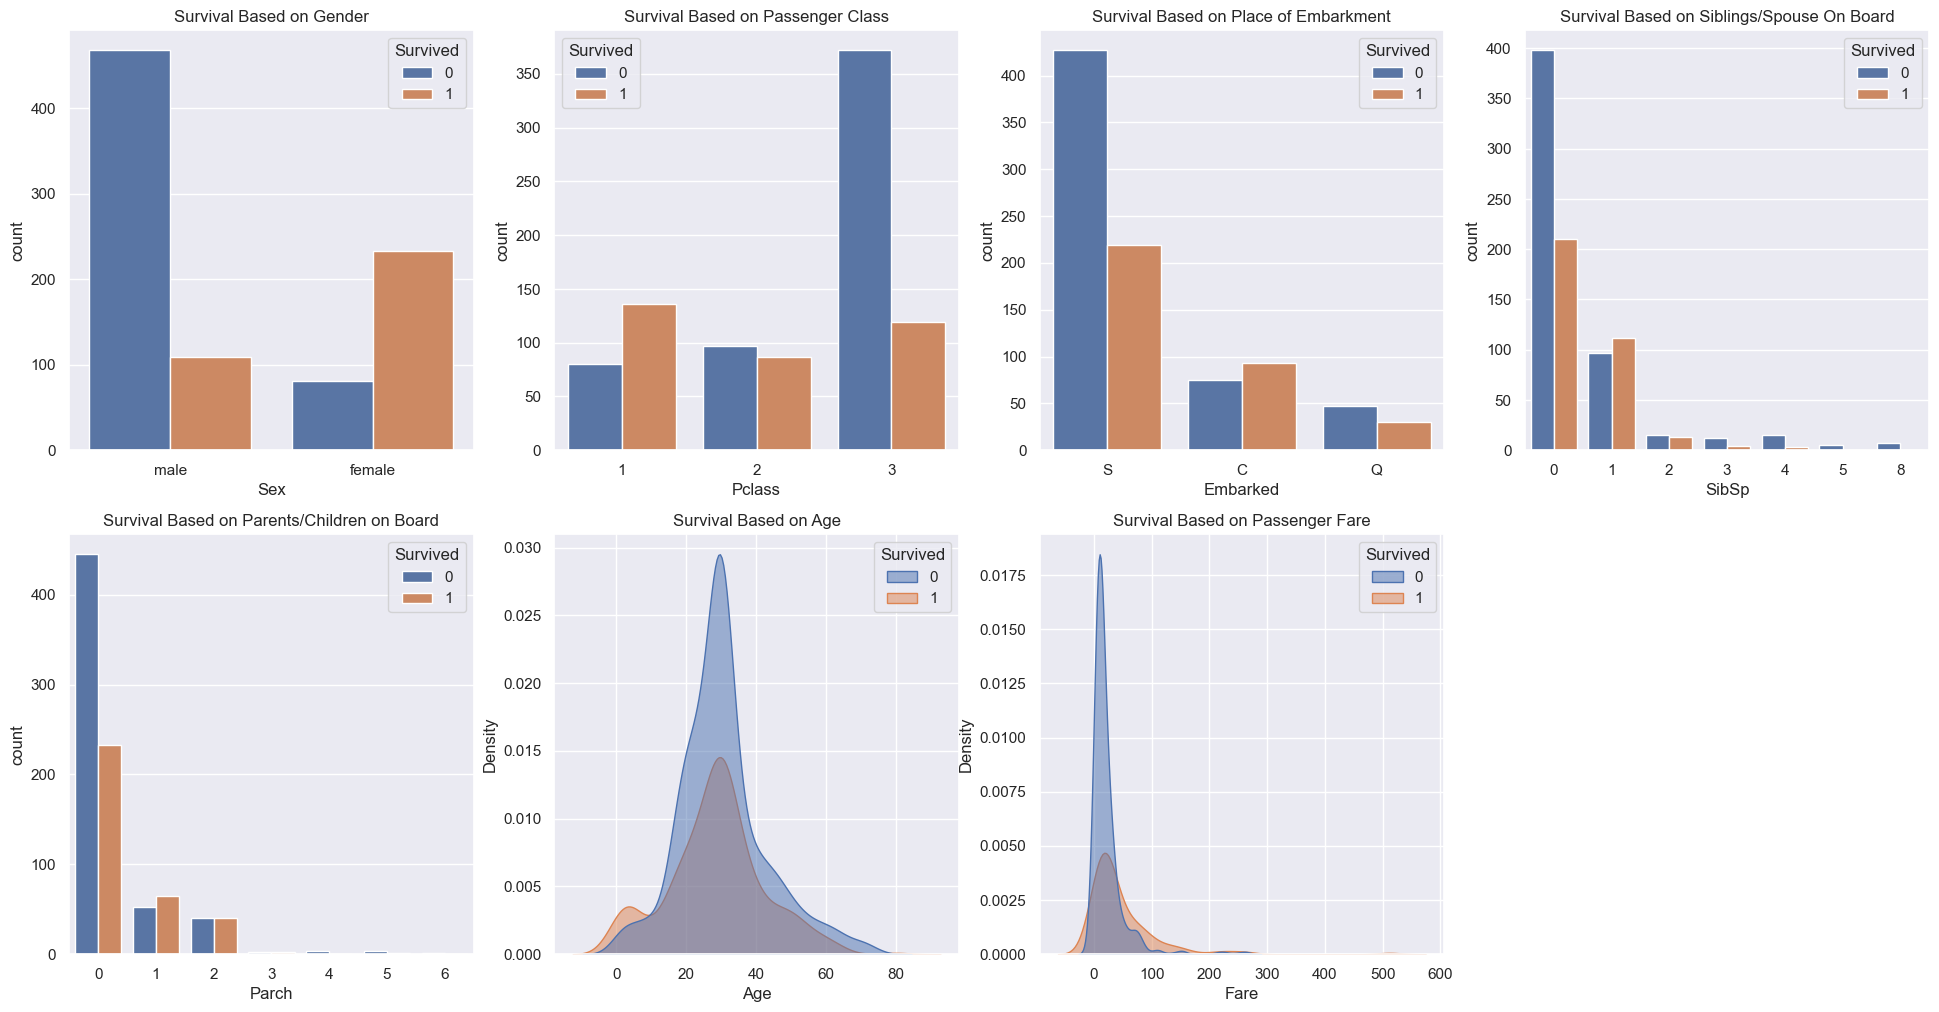

In [42]:
#data visualisations of the relationship between variables and survival column
plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
plt.title('Survival Based on Gender', size =12)
sns.countplot( data = df, x= 'Sex', hue = 'Survived')

plt.subplot(2,4,2)
plt.title('Survival Based on Passenger Class')
sns.countplot(data = df, x= 'Pclass', hue ='Survived')

plt.subplot(2,4,3)
plt.title('Survival Based on Place of Embarkment')
sns.countplot(data = df, x = 'Embarked', hue = 'Survived')

plt.subplot(2,4,4)
plt.title('Survival Based on Siblings/Spouse On Board')
sns.countplot(data = df, x= 'SibSp', hue = 'Survived')

plt.subplot(2,4,5)
plt.title('Survival Based on Parents/Children on Board')
sns.countplot(data = df, x = 'Parch', hue = 'Survived')

plt.subplot(2,4,6)
plt.title('Survival Based on Age')
sns.kdeplot(data = df, x= 'Age', hue = 'Survived', fill = True, alpha= 0.5)

plt.subplot(2,4,7)
plt.title('Survival Based on Passenger Fare')
sns.kdeplot(data = df, x = 'Fare', hue = 'Survived', fill = True, alpha = 0.5)

# MACHINE LEARNING

In [43]:
#Convert the string variables into numeric
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2})

In [44]:
df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
5,0,3,1,30.0,0,0,8.4583,2


In [45]:
#Run another correlation of all variables including the converted variable
corr1=df.corr()
corr1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.070657,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.329727,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084660,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.070657,-0.329727,0.084660,1.000000,-0.232440,-0.180330,0.090632,0.010407
SibSp,-0.035322,0.083081,-0.114631,-0.232440,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.180330,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.090632,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,0.010407,-0.059961,-0.078665,0.062142,1.000000


In [46]:
#check the correlation between the Survived column and other variables
df.corr()['Survived']

#Survival column has a strong negative relationship with Sex and a weak positive relationship with Fare 

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.070657
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.106811
Name: Survived, dtype: float64

<Axes: >

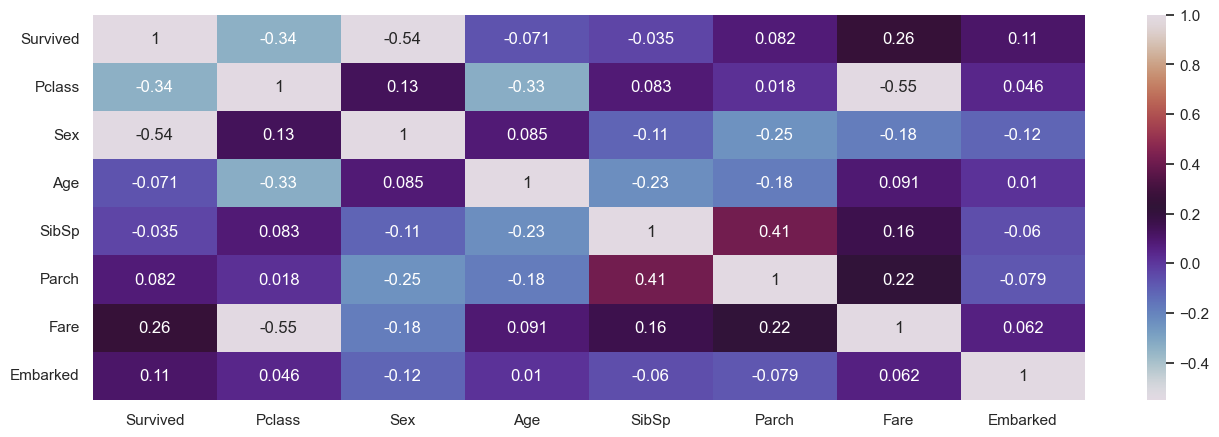

In [47]:
sns.heatmap(corr1, annot = True, cmap = 'twilight')

In [48]:
#Split the data into x and y axis

X=df.drop('Survived',axis=1)
Y=df['Survived']

In [49]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [50]:
X_train.shape
#the X train data has 712 rows and 7 columns

(712, 7)

In [51]:
X_test.shape
#the X test data has 179 rows and 7 columns

(179, 7)

In [52]:
Y_train.shape
#the Y train data has 712 rows and one column which is the 'Survived'

(712,)

In [53]:
Y_test.shape
#the Y test data has 179 rows and one column which is the 'Survived'

(179,)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


# CREATING A NAIVES BAYES MODEL

In [55]:
#import the required package
from sklearn.naive_bayes import GaussianNB
naives_model = GaussianNB()

In [56]:
naives_model.fit(X_train, Y_train)

GaussianNB()

In [57]:
NB_pred= naives_model.predict(X_test)
NB_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [58]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print("Accuracy:", accuracy_score(Y_test,NB_pred))

Accuracy: 0.8100558659217877


In [60]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(Y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       119
           1       0.70      0.77      0.73        60

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.82      0.81      0.81       179



# RANDOM FOREST CLASSIFER MODEL

In [61]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

## import graphviz

In [74]:
#fitting and evaluating the model using default parameters
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [75]:
y_pred1 = rf.predict(X_test)
y_pred1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [76]:
#Check the accuracy of the predicted results of default parameters
accuracy = accuracy_score(Y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.8379888268156425


In [77]:

acc_train= rf.score(X_train,Y_train)
acc_test= rf.score(X_test, Y_test)

print('Accuracy for train:',acc_train)
print('Accuracy for test:', acc_test)

Accuracy for train: 0.9831460674157303
Accuracy for test: 0.8379888268156425


In [83]:
#Hyperparameter tunning of the random forest to improve model
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
             'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10)}

# Create a random forest classifier
rf1 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf1, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBBADAE620>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBBF1EF1C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBBC6FB2B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBBF24B970>})

In [84]:
# Get the best model and its parameters
best_params = rand_search.best_params_
best_score= rand_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 136}
Best Score: 0.8146754653796908


In [85]:
#fit the model with best parameters from tunning
rfmodel = RandomForestClassifier(max_depth=7, min_samples_leaf= 2, min_samples_split= 9, n_estimators= 136)
rfmodel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=9,
                       n_estimators=136)

In [86]:
rf_pred =rfmodel.predict(X_test)
#Prediction of the first fifteen passengers
rf_pred[:15]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [87]:
#Check the accuracy of the predicted results
accuracy = accuracy_score(Y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8603351955307262


In [88]:
#Accuracy score of fine tune parameters
atr= rfmodel.score(X_train, Y_train)
ats= rfmodel.score(X_test,Y_test)

print('Train accuracy:',atr)
print('Test accruacy:', ats)

Train accuracy: 0.8721910112359551
Test accruacy: 0.8603351955307262


In [89]:
# printing the report
print(classification_report(Y_test, rf_pred))

#the accuracy of the random forest is 82%

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       119
           1       0.81      0.77      0.79        60

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



# LOGISTIC REGRESSION MODEL

In [90]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler() 
X_train1 = sc_X.fit_transform(X_train)
X_test1 = sc_X.fit_transform(X_test)

In [91]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train1, Y_train)


LogisticRegression()

In [92]:
#pedict y based on the fitted logistic model
lgr_pred = logreg.predict(X_test1)
lgr_pred[:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [93]:
#Check the accuracy of the predicted results
accuracy = accuracy_score(Y_test, lgr_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


In [94]:
#Accuracy score of the model
ltr= logreg.score(X_train1, Y_train)
lts= logreg.score(X_test1,Y_test)

print('Train accuracy:',ltr)
print('Test accruacy:', lts)

Train accuracy: 0.7921348314606742
Test accruacy: 0.8100558659217877


In [95]:
# printing the report
print(classification_report(Y_test, lgr_pred))

#the accuracy of the random forest is 85%

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       119
           1       0.69      0.80      0.74        60

    accuracy                           0.81       179
   macro avg       0.79      0.81      0.79       179
weighted avg       0.82      0.81      0.81       179



In [98]:
#use the test.csv data to predict survIval based on models
test.head()


In [105]:
#Convert the string variables into numeric
test.Sex=test.Sex.map({'female':0, 'male':1})
test.Embarked=test.Embarked.map({'S':0, 'C':1, 'Q':2})

In [114]:
#Replace NA for Age with mean and Fare with median
test.fillna({"Age":test['Age'].mean().round(0), 
           "Fare":test['Fare'].median()}, 
          inplace=True)

In [115]:
#select input 'x' variables for prediction
x_test= test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,0
414,1,0,39.0,0,0,108.9000,1
415,3,1,38.5,0,0,7.2500,0
416,3,1,30.0,0,0,8.0500,0


In [116]:
#check for NA since we re using random forest and it doesnt accept na
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
#Predict survival of test data using random forest model because it had the highest accuracy
S_prediction = rfmodel.predict(x_test)
S_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
#output the result
output = pd.DataFrame({'PassengerId': test.PassengerId,
                           'Survived': S_prediction})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
# Save the results as a CSV file
output.to_csv('submission.csv', index=False)

In [129]:
print("Your submission was successfully saved!")


Your submission was successfully saved!
